In [47]:
import librosa
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import sklearn

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

data = np.arange(100)
training_dataset, test_dataset = train_test_split(data)

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
audio_path = 'genres/blues/blues.00000.wav'

In [3]:
x , sr = librosa.load(audio_path)

In [4]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [5]:
print(x.shape, sr)

(661794,) 22050


In [6]:
librosa.load(audio_path, sr=44100)

(array([ 0.00735559,  0.01335777,  0.01657013, ..., -0.07286715,
        -0.0628456 , -0.03154328], dtype=float32),
 44100)

In [7]:
librosa.load(audio_path, sr=None)

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050)

In [8]:
import IPython.display as ipd

In [9]:
ipd.Audio(audio_path)

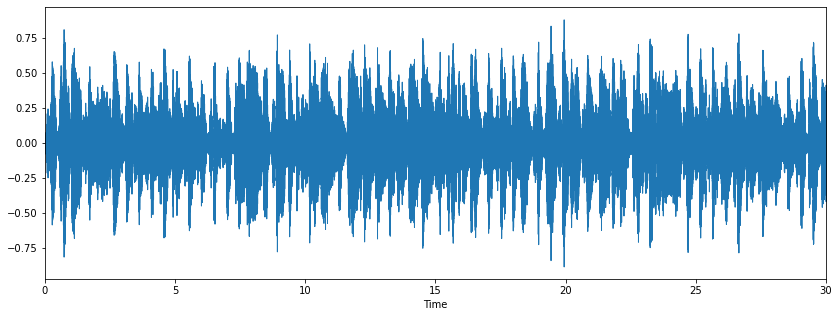

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [31]:
audio_path = 'genres/rock/rock.00000.wav'

In [32]:
x , sr = librosa.load(audio_path)

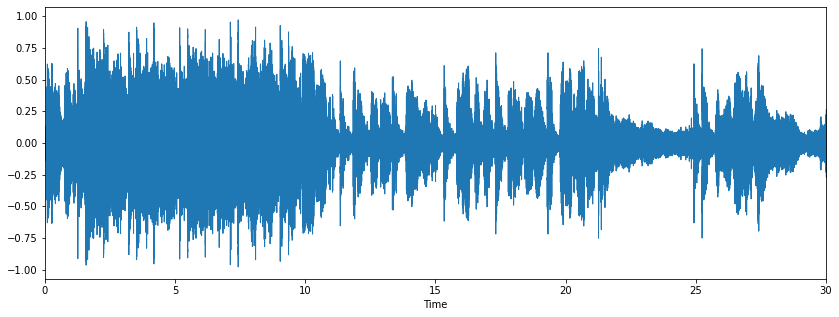

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [27]:
audio_path = 'genres/classical/classical.00000.wav'

In [29]:
x , sr = librosa.load(audio_path)

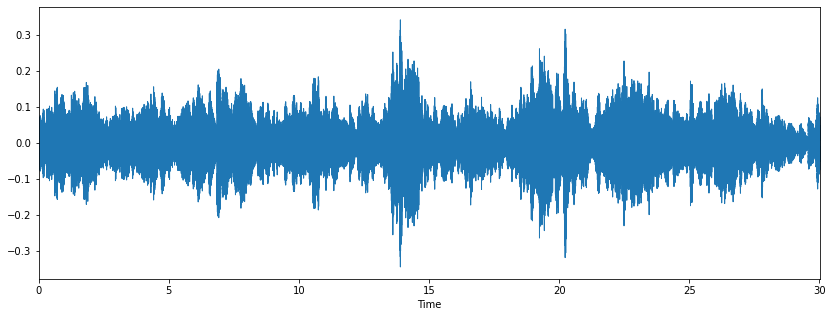

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

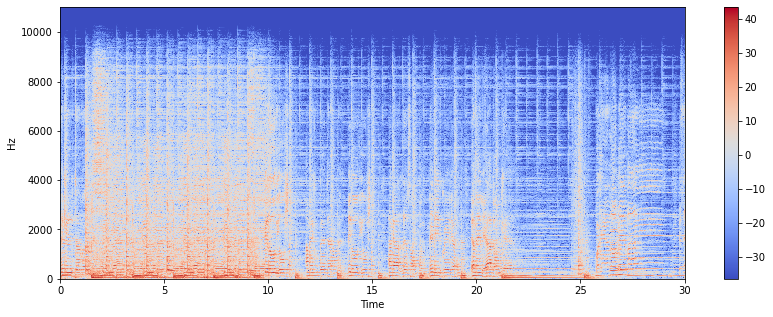

In [34]:
#A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. 
#Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, 
#they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time.
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

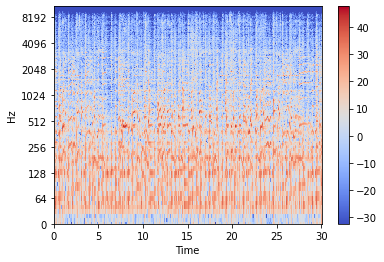

In [12]:
#The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 
#Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic 
#one.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [13]:
#librosa.output.write_wav saves a NumPy array to a WAV file.
import soundfile as sf
sf.write('example.wav', x,sr)

In [14]:
#Let us now create an audio signal at 220Hz.
#An audio signal is a numpy array, so we shall create one and pass it into the audio function.
import numpy as np
import soundfile as sf
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
sf.write('tone_220.wav', x,sr)

In [15]:
ipd.Audio(x, rate=sr)

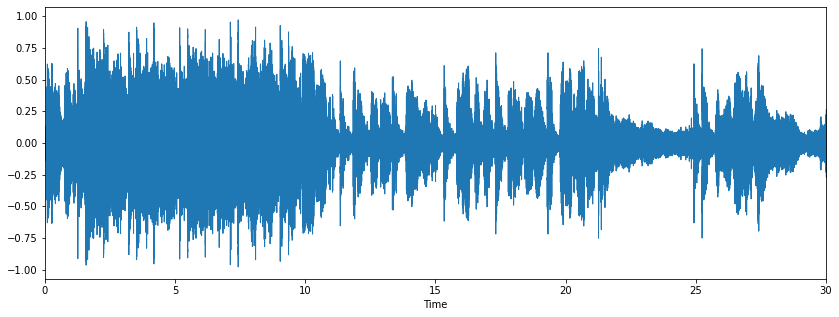

In [35]:
#Zero Crossing Rate
#The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive 
#to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. 
#It usually has higher values for highly percussive sounds like those in metal and rock.
#Let us calculate the zero crossing rate for our example audio clip.

x, sr = librosa.load('genres/rock/rock.00000.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

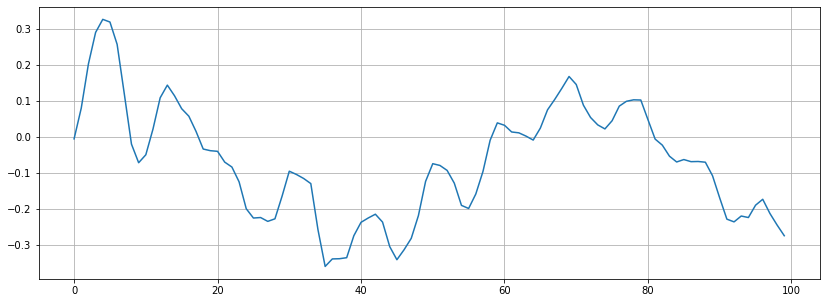

In [36]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [38]:
#16 zero crossings
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

8


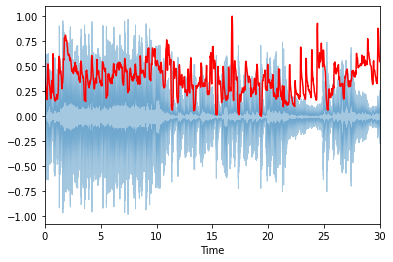

In [49]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

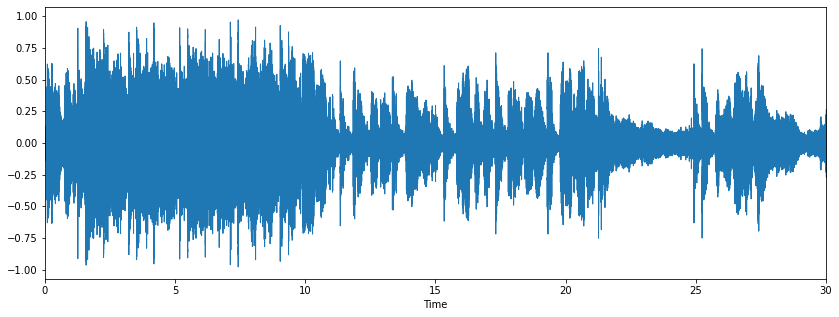

In [57]:
x, sr = librosa.load('genres/rock/rock.00000.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

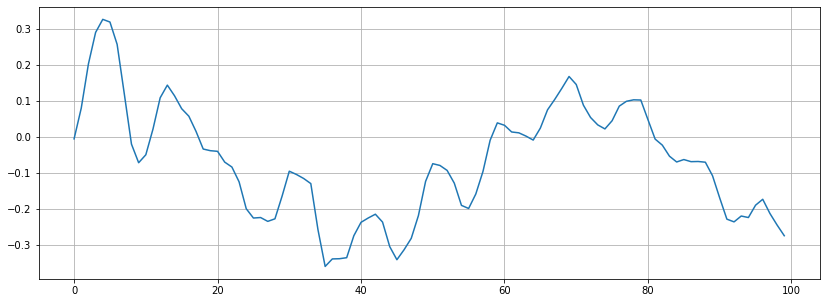

In [58]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

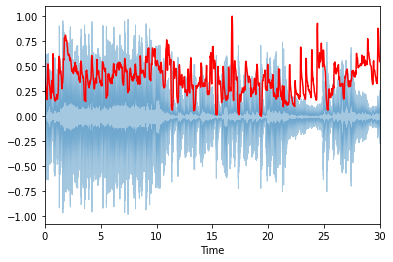

In [59]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

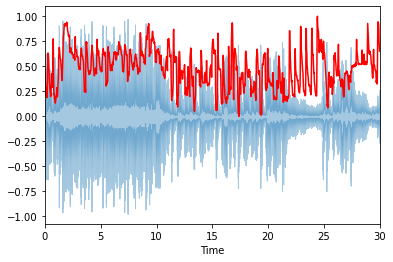

In [61]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 1293)


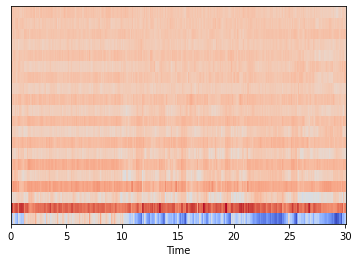

In [65]:
mfccs = librosa.feature.mfcc(x,sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

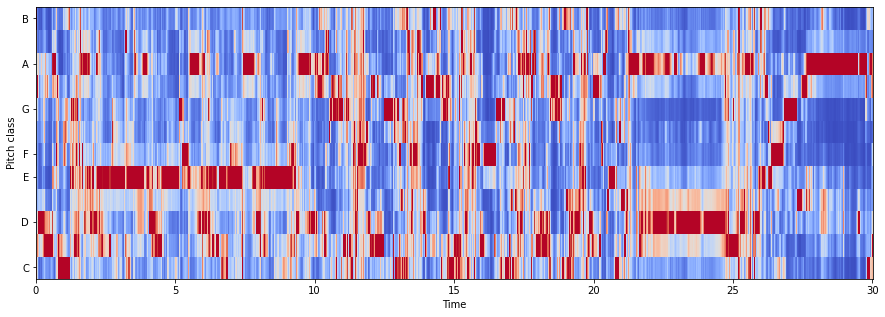

In [67]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [28]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'genres/{g}'):
        songname = f'genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [30]:
data = pd.read_csv('data.csv')
data.tail()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
995,rock.00095.wav,0.351991,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,59.040672,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,rock.00096.wav,0.398653,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,49.122971,...,14.065345,-16.394693,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,rock.00097.wav,0.432103,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,52.834530,...,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,rock.00098.wav,0.362349,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,56.595062,...,7.683083,-10.071786,-0.255098,-5.276486,-2.816288,-4.416438,1.558265,-5.043121,-3.585596,rock
999,rock.00099.wav,0.358195,1609.442919,1797.065098,3246.280370,0.076290,-235.189331,123.888542,-22.536184,52.915512,...,10.066769,-15.019588,3.110468,-7.127754,1.784515,-7.070405,0.023643,-2.022034,1.158525,rock
